##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number: 23***

---
***Group Members: Nilay Girgaonkar, Harshavardhan Gali, Krittika Paul, Shrey Singhal, Avaneesh Kulkarni***

---
***ID Numbers: 2021AAPS0566H, 2021AAPS0691H, 2021AAPS0628H, 2021A4PS3097H, 2021A4PS2560H***


This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

#We have commented out the data generation part as we have generated the dataset in another notebook and are importing the dataset to use here

In [ ]:
"""%pip install sdv
%pip install urllib3==1.26.7
restart runtime after this"""

'%pip install sdv\n%pip install urllib3==1.26.7\nrestart runtime after this'

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')
import os

# Set the search parameters
filename = 'diabetes.xlsx'
search_path = '/content/drive/My Drive'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

import pandas as pd

# Load the excel file into a DataFrame
df = pd.read_excel(file_path)
# View the first few rows of the DataFrame
df.head()
from sdv.metadata import SingleTableMetadata
#Generate metadeta
metadata = SingleTableMetadata()

metadata.detect_from_dataframe(data=df)
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)
synthesizer.fit(
    data=df
)
synthetic_data = synthesizer.sample(
    num_rows=500
)

synthetic_data.head()
synthesizer.save('my_synthesizer.pkl')

synthesizer = SingleTablePreset.load('my_synthesizer.pkl')
###export dataframe as csv
synthetic_data.to_csv('synthetic_data_diabetes.csv')"""

"from google.colab import drive\ndrive.mount('/content/drive')\nimport os\n\n# Set the search parameters\nfilename = 'diabetes.xlsx'\nsearch_path = '/content/drive/My Drive'\n\n# Search for the file\nfor root, dirs, files in os.walk(search_path):\n    if filename in files:\n        file_path = os.path.join(root, filename)\n        break\n\nimport pandas as pd\n\n# Load the excel file into a DataFrame\ndf = pd.read_excel(file_path)\n# View the first few rows of the DataFrame\ndf.head()\nfrom sdv.metadata import SingleTableMetadata\n#Generate metadeta\nmetadata = SingleTableMetadata()\n\nmetadata.detect_from_dataframe(data=df)\nfrom sdv.lite import SingleTablePreset\n\nsynthesizer = SingleTablePreset(\n    metadata,\n    name='FAST_ML'\n)\nsynthesizer.fit(\n    data=df\n)\nsynthetic_data = synthesizer.sample(\n    num_rows=500\n)\n\nsynthetic_data.head()\nsynthesizer.save('my_synthesizer.pkl')\n\nsynthesizer = SingleTablePreset.load('my_synthesizer.pkl')\n###export dataframe as csv\nsynt



```
# This is formatted as code
```

# ***2. Preprocessing and performing exploratory data analysis of the dataset obtained***

#We are importing the file from google drive as we have already synthesised the data before




In [ ]:
#Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from google.colab import drive
drive.mount('/content/drive')
import os

# Set the search parameters
filename = 'synthetic_data_diabetes.csv'
search_path = '/content/drive/My Drive'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

import pandas as pd

# Load the csv file into a DataFrame
data = pd.read_csv(file_path)
data = data.iloc[0:500, 1:]
# View the first few rows of the DataFrame
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19,10,38.387409,0.561331,40,1
1,0,151,44,6,105,26.125923,0.463959,27,1
2,3,169,57,24,240,33.224573,0.541364,36,0
3,4,86,61,35,0,32.918264,0.526311,39,0
4,6,75,62,31,77,37.453830,0.178734,21,0


### Here, we can see that our dataset consists of 8 features and 1 outcome column. The features are as follows:
>

1.   Pregnancies
2.   Glucose
3.   Blood Pressure
4.   Skin Thickness
5.   Insulin
6.   BMI
7.   Diabetes Pedigree Function
8.   Age



In [ ]:
#Splitting data into features and target values
X_complete = data.iloc[:,0:8]
Y_complete = data.iloc[:,8:]

In [ ]:
#First 5 rows of features
X_complete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,149,96,19,10,38.387409,0.561331,40
1,0,151,44,6,105,26.125923,0.463959,27
2,3,169,57,24,240,33.224573,0.541364,36
3,4,86,61,35,0,32.918264,0.526311,39
4,6,75,62,31,77,37.453830,0.178734,21


In [ ]:
#First 5 rows of target value
Y_complete.head()

,Outcome
0,1
1,1
2,0
3,0
4,0


## **_2.1 Exploring the Data_**

### In this section, we'll be performing exploratory data analysis of the features of the given dataset:
### 1. Plotting a correlation matrix to understand the relationship between the different features
###2. Boxplots to understand the distribution of each feature and detect outliers
###3. Histograms for each feature

### ***_2.1.1 Correlation Matrix_***

### Correlation matrix is a statistical technique that evaluates the relationship between any 2 features in the dataset. The correlation coefficient can range from -1 to +1, with positive numbers indicating higher correlation. As seen below, each feature has a correlation of 1 with itself, and varying degrees of correlation with other features.

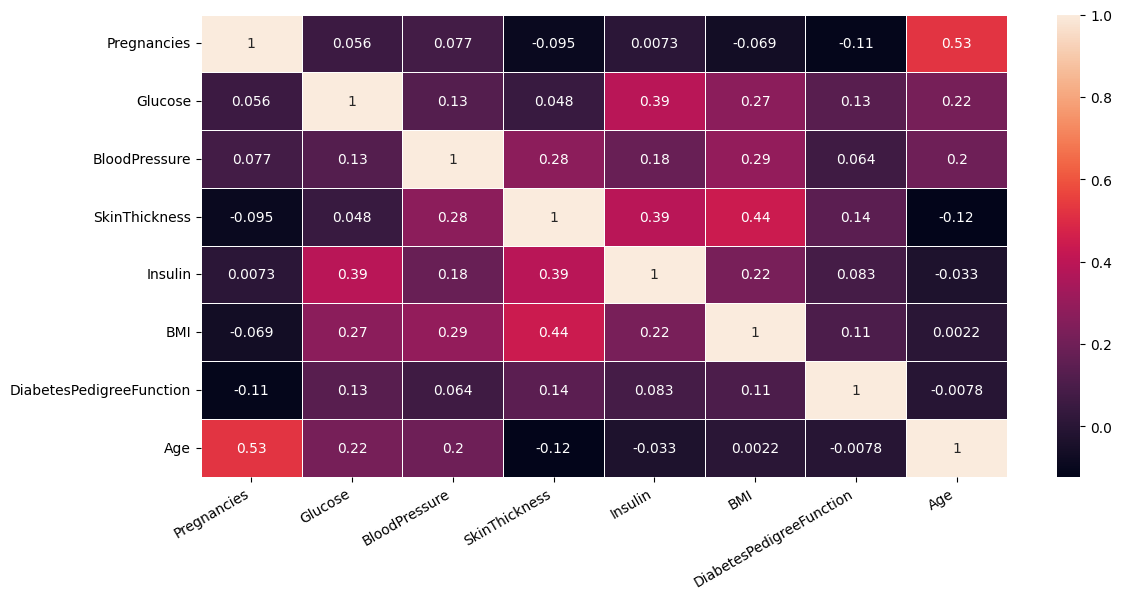

In [ ]:
#PLOTTING THE CORRELATION MATRIX

corrmat = X_complete.corr()

plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax = 1, annot = True, linewidths = .5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

### ***_2.1.2 Boxplot_***

### A Boxplot displays the 5 number summary of a set of data. It helps graphically represent the skewness and spread of data using their quartiles. The 5 quantities represented are minimum, first quartile, median, third quartile, fourth quartile, and maximum. Using boxplots, outliers in the data can be detected and removed. Here, in the graph, the Y axis has been scaled down but the spread of each feature is still visually apparent.

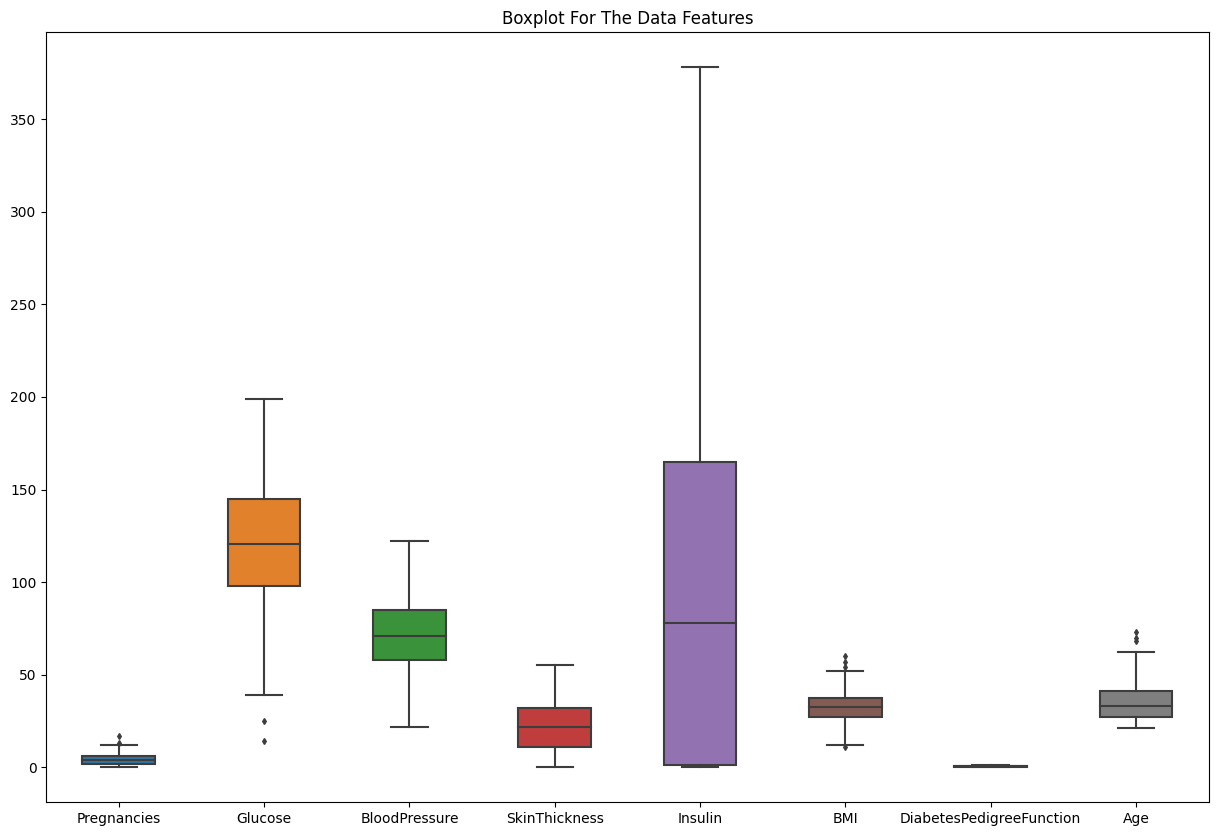

In [ ]:
#PLOTTING THE BOXPLOT FOR THE DATA

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X_complete, width= 0.5,ax=ax,  fliersize=3)
plt.title("Boxplot For The Data Features")
plt.show()

### ***_2.1.3 Histogram Plotting for each feature_***

### Histogram plotting offers another way to visualize data by defining quantized bins and then counting the number of data observations that fall within those bins. It is another way to visualize the spread and distribution of data.

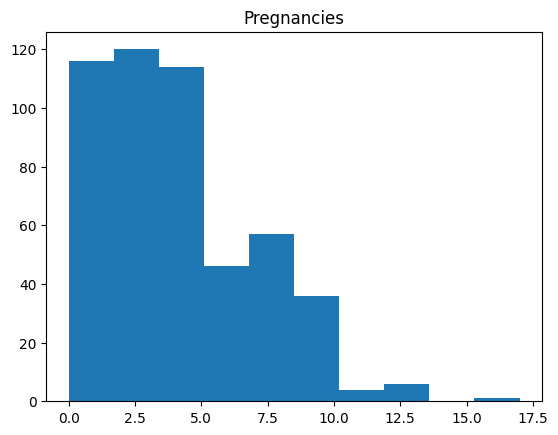

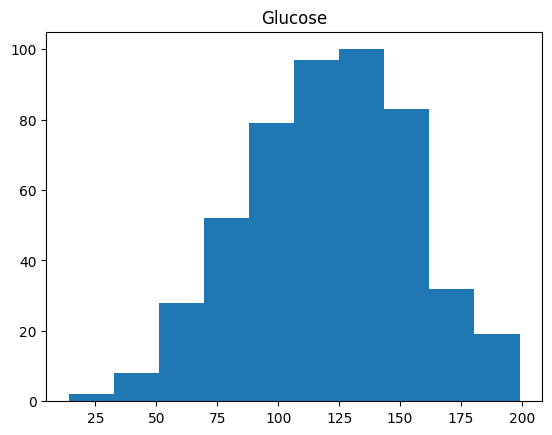

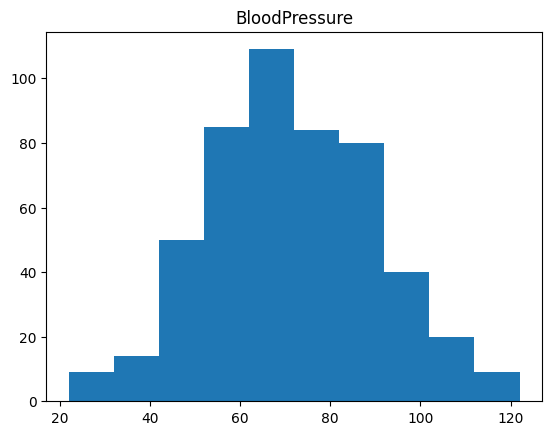

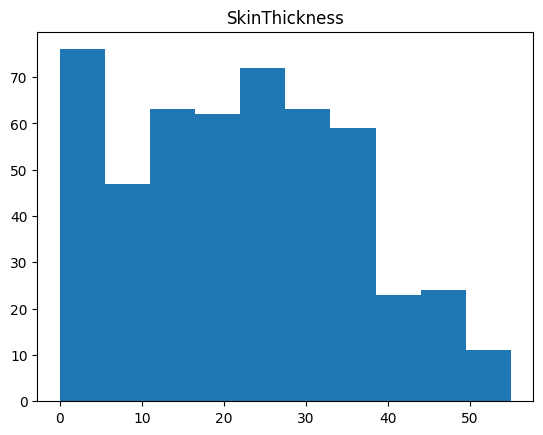

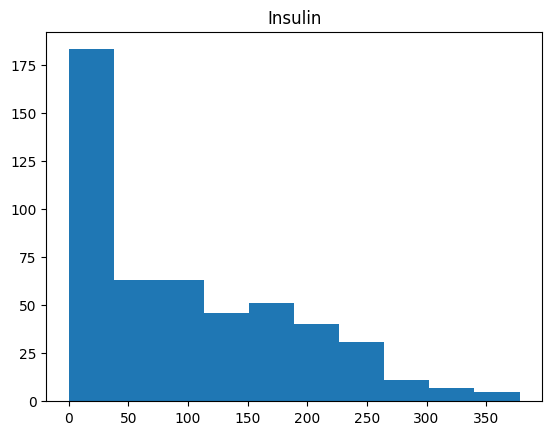

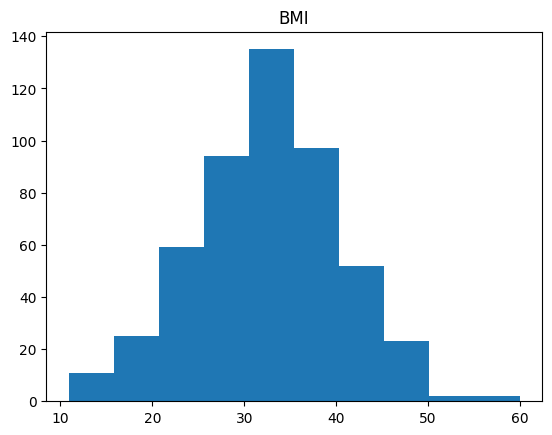

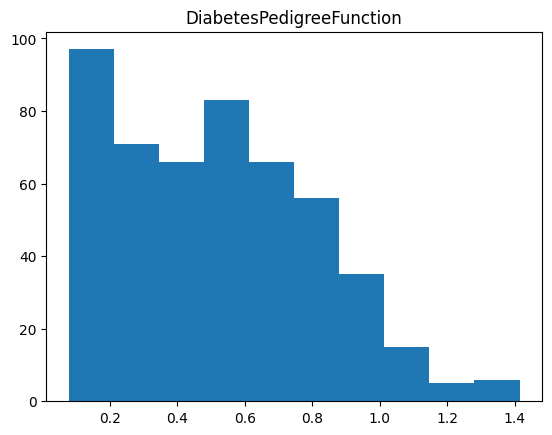

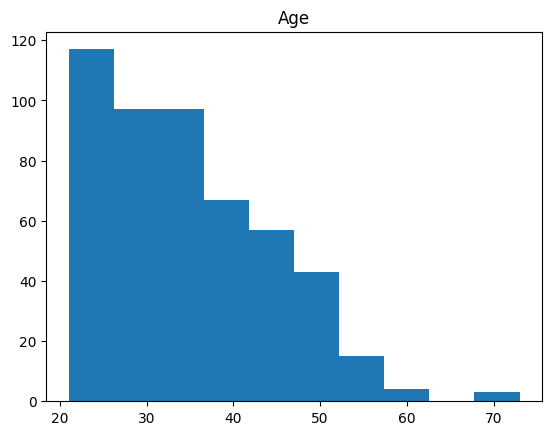

In [ ]:
m,n=X_complete.shape
for i in range(n):
    dummy=X_complete.iloc[:,i:i+1]
    dummy=dummy.to_numpy()
    plt.title(X_complete.columns[i])
    plt.hist(dummy)
    plt.show()

## ***_2.2 Handling Outliers_***

### Outliers are those observations in dataset whose values deviate significantly from the rest of the data for that particular feature. They can have a huge impact on the performance of ML models. Therefore, they must be detected and removed. One way of identifying outliers, and the method we used, is to treat those observations which are more than 3 standard deviations away from the mean of that feature as outliers. These are then removed.


In [ ]:
df=X_complete
m,n=df.shape
for col in df.columns:
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(3*sd))]
print(X_complete.shape[0]-df.shape[0]," Outliers removed")

7  Outliers removed


## **_2.3 Normalization_**

### Normalization is a data pre-processing technique that scales feature values that have different scale. Otherwise, the effect of important features that have a smaller scale will be diluted simply because the less important features had larger values. Normalization scales all the features down to the same range so that the scale of a feature does not unduly affect its importance. The data can be normalized by subtracting the **mean** from each datapoint and dividing it by the **standard deviation**.

In [ ]:
def normalise(X):#normalisation function
    m,n=X.shape
    mean=np.zeros((n,1))
    variance=np.zeros((n,1))
    for i in range(m):
        for j in range(n):
            mean[j]+=X[i,j]
    mean=mean/m

    for i in range(m):
        for j in range(n):
            variance[j]+=(X[i,j]-mean[j])**2

    variance=variance/m
    sd=np.sqrt(variance)
    for i in range(m):
        for j in range(n):
            X[i,j]=(X[i,j]-mean[j])/sd[j]
    dummy=X
    X=np.ones((m,1))#adding a column of ones to denote x0
    X = np.concatenate((X, dummy), axis=1)
    return X

## ***_2.4 Splitting Dataset into Test and Training Sets_***

### The dataset is split into training and test sets at this point. The training set is the data on which the model will be trained. To judge the performance of the model, the test set data is fed to the model. We will be doing an 80-20 split of training to test data. To prevent overfitting of the models to the training data, you have to be careful about the number of epochs you train the model for.

In [ ]:
#Converting DataFrames to Numpy Arrays
X_complete=X_complete.to_numpy()
Y_complete=Y_complete.to_numpy()
Y_complete= np.reshape(Y_complete, len(Y_complete))
m,n = X_complete.shape
#Splitting into training and test data
train_rate=0.8
m=math.ceil(train_rate*X_complete.shape[0])
X_train=X_complete[:m, :]
Y_train=Y_complete[:m]
X_train=normalise(X_train)
m=X_complete.shape[0]-m
X_test=X_complete[-m:, :]
Y_test=Y_complete[-m:]
X_test=normalise(X_test)

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

Stochastic Gradient Descent (SGD) is a fundamental optimization algorithm widely used in machine learning and deep learning. It's designed to efficiently find the optimal parameters of a model by iteratively updating them based on the gradients of a loss function with respect to the data.
Unlike traditional gradient descent, which computes gradients using the entire dataset (batch gradient descent), SGD operates on a randomly selected subset of the data for each iteration. This randomness introduces noise into the gradient estimation, which can help the algorithm escape local minima and explore the parameter space more efficiently.

Here's how SGD works in a nutshell:

1. **Initialization:** Start with an initial set of parameters for the model.

2. **Iterative Update:** For each iteration:
   - Randomly select a mini-batch (subset) of training data.
   - Compute the gradient of the loss function with respect to the mini-batch.
   - Update the model parameters by taking a small step in the direction of the negative gradient.

3. **Convergence:** Repeat the iterative updates for a fixed number of epochs or until a convergence criterion is met (e.g., the loss stops decreasing significantly).

In [ ]:
# Function to calculate partial_derivative with respect to the weight vector (m_est)
def partial_derivative(X_example, Y_example, m_est):

    Y_pred = np.dot(X_example , m_est)

    diff = (Y_example - Y_pred)
    df_dm = diff * X_example

    return df_dm

In [ ]:
# Function to calculate Mean Square Error Function
def mse(X,Y,m_est):

    Y_pred = np.dot(X, m_est)
    diff = (Y_pred - Y)
    mse = np.sum((diff**2), axis = 0) / (2*len(X))

    return mse

In [ ]:
# Function for training the model
def sgd_training(X,Y,lr,epochs):
    global stochastic_cost
    for epoch in range(epochs): # This defines the iteration for epochs
        if epoch == 0:
            m_est = np.zeros((X.shape[1]))

        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)


        X = X[indices]
        Y = Y[indices]


        for i in range(len(X)): # This defines the iteration over the training set

            X_example = X[i]
            Y_example = Y[i]

            deriv = partial_derivative(X_example, Y_example, m_est)

            m_est = m_est + (lr * deriv)

        stochastic_cost.append(mse(X,Y,m_est))

    return m_est

In [ ]:
# Declaring the model training hyperparameters
lr = 0.00001
epochs = 1000

# Storing the cost over iterations in a list for plotting
global stochastic_cost
stochastic_cost = []

#Training the model and getting final weight vectors
m_est = sgd_training(X_train, Y_train,lr, epochs)
print(m_est)

# Checking on test set
Y_pred = np.dot(X_test, m_est)
mscost = mse(X_test, Y_test, m_est)

[ 0.34113635  0.06228838  0.17385864 -0.03762866  0.03329233 -0.01699107
  0.08051656  0.01332275 -0.00104444]


In [ ]:
#Printing the final cost
mscost

0.08223878514962106

In [ ]:
#Attempting to predict accuracy on training set

accuracy = 0
m,n = X_test.shape
for i in range(m):
  temp = Y_pred[i]
  if temp<0.5:
        temp=0
  else:
      temp=1
  if temp==Y_test[i]:
      accuracy+=1
print("Accuracy: ", (accuracy/m)*100, "%")

Accuracy:  73.0 %


## **_Batch Gradient Descent_**

#Batch Gradient Descent

Batch Gradient Descent is an optimization algorithm used for training machine learning models, particularly in the context of linear regression and neural networks.

## Explanation

- **Objective**: Batch Gradient Descent is used to minimize a cost or loss function by iteratively adjusting the model parameters.

- **Batch Processing**: It processes the entire training dataset in each iteration.

- **Steps**:
  1. Initialize model parameters randomly or with predefined values.
  2. Calculate the gradient of the cost function with respect to each parameter using the entire dataset (hence "batch").
  3. Update the model parameters by taking a step in the direction of the negative gradient to minimize the cost.
  4. Repeat steps 2 and 3 until convergence or for a fixed number of iterations.

- **Advantages**:
  - Stable and converges to a global minimum with convex cost functions.
  - Guaranteed convergence with a sufficiently small learning rate.
  
- **Challenges**:
  - Computationally intensive for large datasets.
  - May converge to a local minimum for non-convex cost functions.

- **Learning Rate**: The learning rate (α) controls the step size in each iteration. It needs to be carefully chosen to ensure convergence without overshooting the minimum.

- **Convergence**: Batch Gradient Descent typically converges to a minimum of the cost function but may be slow for large datasets.

Batch Gradient Descent is a foundational optimization technique used to train various machine learning models, ensuring that they learn the optimal parameters for making accurate predictions.

In [ ]:
def cost_function(X,Y,w):#defining cost
    m=X.shape[0]
    total_cost=0
    for i in range (m):
        total_cost+=(np.dot(X[i],w)-Y[i])**2
    return total_cost/(2*m)


In [ ]:
def gradient(X,Y,w):#defining the gradient
    m,n=X.shape
    dj_dw=np.zeros((n,1))
    for i in range (m):
        temp=np.dot(X[i],w)-Y[i]
        for j in range(n):
          dj_dw[j]+=temp*X[i,j]
    return dj_dw/m


In [ ]:
def batch_gradient_descent(X,Y,w,a,iterations):#defining the gradient descent
    m,n=X.shape
    global batch_gradient_cost

    for i in range (iterations):
        dj_dw=gradient(X,Y,w)#calculating gradient
        for j in range(n):
            w[j]-=a*dj_dw[j]#updating the weights
        batch_gradient_cost.append(cost_function(X,Y,w))#adding the costs to a list so that we can see the pattern
    return w


In [ ]:
global batch_gradient_cost
batch_gradient_cost = []
w=np.zeros((9,1))
a=0.06
iterations=1000
print(batch_gradient_descent(X_train,Y_train,w,a,iterations))

[[ 0.3475    ]
 [ 0.07483715]
 [ 0.1913754 ]
 [-0.03944641]
 [ 0.04388457]
 [-0.03307973]
 [ 0.07817399]
 [ 0.0104576 ]
 [-0.01613101]]


In [ ]:
correct=0;
m,n=X_test.shape
for i in range (m):
    temp=np.dot(X_test[i],w)
    if temp<0.5:
        temp=0
    else:
        temp=1
    if temp==Y_test[i]:
        correct+=1
print("Accuracy: ", (correct/m)*100, "%")

Accuracy:  74.0 %


## **_Insights Drawn_**

### Batch Gradient Descent and Stochastic Gradient Descent are both two different gradient descent techniques used for linear regression. Batch gradient descent requires more computation because it processes the entire dataset at once. However, it is more accurate and scales better as number of functions increase. Stochastic gradient descent converges faster, but has a tendency to jump around a lot. However, its is computationally more efficient and takes less time to converge.

### As we can see, both SGD and BGD give roughly the same final cost (this might be due to the fact that number of samples is very less). The graph also does not take into consideration the time taken for SGD to converge, which is less than BGD. In general, linear regression is a very poor method for classification.

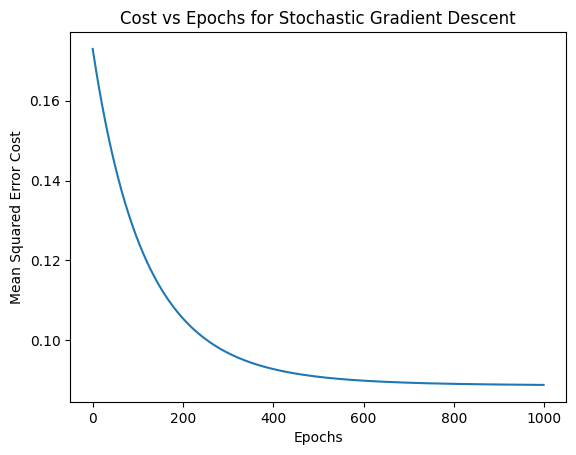

In [ ]:
#Plotting "Cost vs Epochs" for Stochastic Gradient Descent
plt.plot(stochastic_cost)
plt.ylabel("Mean Squared Error Cost")
plt.xlabel("Epochs")
plt.title("Cost vs Epochs for Stochastic Gradient Descent")
plt.show()

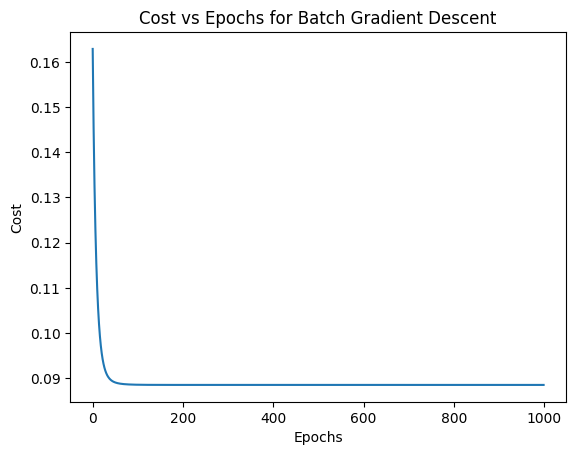

In [ ]:
#Plotting "Cost vs Epochs" for Batch Gradient Descent
plt.plot(batch_gradient_cost)
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Cost vs Epochs for Batch Gradient Descent")
plt.show()

# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## **_Lasso Regression_**

# Key difference:

 The key difference is in how the two regressions penalize the coefficients. Lasso can lead to feature selection by making some coefficients exactly zero, while Ridge generally shrinks all coefficients towards zero without eliminating any completely. This difference makes them suitable for different scenarios and feature engineering needs.


# LASSO REGRESSION : An Introduction

Lasso regression is used for both regression and feature selection. It's especially useful when dealing with high-dimensional data with potentially irrelevant features.

The purpose of Lasso is to prevent overfitting by imposing a constraint on the sum of the absolute values of the coefficients (weights).

# Why use Lasso?
Lasso helps in preventing overfitting, especially when dealing with datasets
that have a large number of features compared to the number of samples. By reducing the impact of less important features, Lasso can create a better model that is less likely to overfit the training data.

Lasso can help identify the most important predictors in a model.


# Regularization : A Solution
Lasso provides a form of regularization. It adds a penalty term to the linear regression cost function, which discourages overly large coefficients. This can lead to more stable and better-behaved models, especially when multicollinearity (high correlation between features) is present.

#Lasso Regularization (L1 norm)
L1 Regularization Term: This term adds a penalty to the loss based on the absolute values of the regression coefficients (weights). It encourages some of the coefficients to become exactly zero, effectively performing feature selection. The amount of regularization is controlled by a hyperparameter, often denoted as λ (lambda).

It is effective when there are many features, and you suspect that only a subset of them is relevant to the prediction task.




In [ ]:
degree=2
features=len(X_complete[0])
rows=len(X_complete)
Rlrate=0.1
Rlambda= 1 # the lambda is a hyperparameter representing the strength of the regularization
epochs=1000 # the number of times the model will run
global lasso_cost
lasso_cost = []

In [ ]:
n_poly=(np.math.factorial(degree+features))/(features*np.math.factorial(degree)) # finding the number of variables in the multivariate expression
def create_polynomial_features(X_train, degree):
    m, n = X_train.shape
    X_poly = np.ones((m, 1))
    for d in range(1, degree + 1): # this loop will generate a polynomial expression for the fetaures present
        for i in range(n):
            X_poly = np.column_stack((X_poly, X_train[:, i]**d))

    return X_poly


In [ ]:
X_completecopy = X_complete
Y_completecopy= Y_complete
X_poly_complete = create_polynomial_features(X_completecopy, degree) # it will create the polynomials for the entire dataset
train_rate=0.8
m=math.ceil(train_rate*X_poly_complete.shape[0])
X_ptrain=X_poly_complete[:m, :] # taking the first 'm' samples of the training set
m=X_poly_complete.shape[0]-m
X_ptest=X_poly_complete[-m:, :]

In [ ]:
def lasso_cost_function(X,Y,w):
    m,n=X.shape
    total_cost=0
    for i in range (m):
        total_cost+=(np.dot(X[i],w)-Y[i])**2 # calculation of ordianry least squared part(OLS)
    for j in range(n) :
        total_cost+=(Rlambda*(w[j])) # calculating the cost function for lasso regression
    return total_cost/(2*m)

In [ ]:
def lasso_gradient(X,Y,w):
    m,n=X.shape
    dj_dw=np.zeros((n,1))
    for i in range (m):
        temp=np.dot(X[i],w)-Y[i]
        for j in range(n): # updating gradients for each feature
          dj_dw[j]+=(temp*X[i,j] + (Rlambda)/2)/m
    return dj_dw # returning the gradient vector

In [ ]:
def lasso_gradient_descent(X,Y,w,a,iterations):
    m,n=X.shape
    for i in range (iterations):
        dj_dw=lasso_gradient(X,Y,w)
        for j in range(n): # updating model weights for each feature
            w[j]-=a*dj_dw[j]
        if i%math.ceil(iterations / 10) == 0:
          print(i, lasso_cost_function(X, Y,w))
        lasso_cost.append(lasso_cost_function(X,Y,w))
    return w

In [ ]:
m,n = X_ptrain.shape
w=np.zeros((n,1))
a=0.00006 # this parameter is the learning rate for the gradient descent
print(lasso_gradient_descent(X_ptrain,Y_train,w,a,epochs)) # displaying the coefficients after training

0 [0.1737889]
100 [0.177658]
200 [0.18148174]
300 [0.18525649]
400 [0.18897978]
500 [0.19265014]
600 [0.1962669]
700 [0.19983005]
800 [0.20334009]
900 [0.20679798]
[[-0.00755013]
 [-0.02491078]
 [-0.01698369]
 [-0.02705104]
 [-0.02532855]
 [-0.02450562]
 [-0.02139172]
 [-0.02637276]
 [-0.02477788]
 [-0.00358635]
 [-0.00792674]
 [-0.00443335]
 [-0.00467369]
 [-0.00204723]
 [-0.00375168]
 [-0.00789034]
 [-0.00530945]]


In [ ]:
correct=0; # counter to keep track of the correct predictions
m,n=X_ptest.shape
for i in range (m):
    temp=np.dot(X_ptest[i],w)
    if temp<0.5:
        temp=0
    else:
        temp=1
    if temp==Y_test[i]:
        correct+=1 # updating the correct predictions
print("Accuracy: ", (correct/m)*100, "%") # displaying the accuracy

Accuracy:  74.0 %


## **_Ridge Regression_**

# RIDGE REGRESSION : An Introduction
Traditional linear regression models are susceptible to overfitting, especially when dealing with high-dimensional datasets. The phenomenon of Overfitting occurs when a model ends up capturing noise , randomfluctations in data or outliers , instead of actually capturing the underlying data . As a result
 the data will be accutrate to the training set but inaccurate to the test set . This means that the data has a high variance .

 High Variance means that the model is highly sensitive to changes in the training set and would thereby fail to accurately predict unseen data there after .

 # Multicollinearity : A Problem

 Another issue when dealing with traditional regression techniques , is Multicollinearity . As such , Multicollinearity referes to when two or more predictors are strongly related to one another . As a result the model fails to make predictions accurately as it cannot tell which predictor impacts the outcome in which way . In other words , the effect of individual predictors cannot be clearly seperated . This is because small changes in the data can lead to significant changes in the estimated coefficients of the model. These coefficients can have large standard errors, making them statistically unreliable.


# Regularization : A Solution
Regularization is a technique used to prevent overfitting and improve the generalization performance of a model. It involves adding a penalty term to the model's objective function that discourages the model from fitting the training data too closely or from having excessively large parameter values. Regularization helps strike a balance between fitting the data well and avoiding complex, overfit models, ultimately leading to better predictive performance on unseen data.

#Ridge Regularization (L2 norm)
Ridge regression is a regularization technique used in linear regression to address multicollinearity and improve the stability of the regression model. It does this by adding a penalty term to the linear regression objective function. This penalty term is proportional to the square of the magnitude of the coefficient values (L2 regularization).

It helps in solving the issue of Multicollinearity by shrinking the coefficients.Ridge regression enables the model to scale back the magnitude of coefficient estimates for all variable , not just for correlated variables. By doing this, it stops a single variable from taking control of the model. Ridge regression has a tendency to more equally spread the effects of correlated variables when there is multicollinearity, which makes the model less sensitive to minute changes in the data.

Similarly , to solve the issue of Overfitting , we introduce a paramter Lambda , also known as a tuning parameter . As you increase this parameter, the ridge penalty becomes more significant, and the coefficients are pushed closer to zero. This helps strike a balance between bias and variance. The model becomes more biased (closer to a simple linear regression model) but less prone to overfitting and multicollinearity.This takes care of the Biance - Variance trade off .




In [ ]:
degree=3
features=len(X_complete[0])
rows=len(X_complete)
Rlambda=3#lambda is our hyperparamter which determines the stregth of the regularization
epochs=1000 #the number of times we run the model overall
global ridge_cost
ridge_cost = []

In [ ]:
n_poly=(np.math.factorial(degree+features))/(features*np.math.factorial(degree))#finding number of variables in the mutivariate expression(as we have 8 features)
def create_polynomial_features(X_train, degree):
    m, n = X_train.shape
    X_poly = np.ones((m, 1))
    for d in range(1, degree + 1):
        for i in range(n):
            X_poly = np.column_stack((X_poly, X_train[:, i]**d))

    return X_poly


In [ ]:
X_poly_complete = create_polynomial_features(X_completecopy, degree)
m=400
X_ptrain=X_poly_complete[:m, :]
m=100
X_ptest=X_poly_complete[-m:, :]

In [ ]:
def cost_function(X,Y,w):
    m,n=X.shape
    total_cost=0
    for i in range (m):
        total_cost+=(np.dot(X[i],w)-Y[i])**2 #multiplying the feature matrix with weight vector , then subtracting the actual value
    for j in range(n) :
        total_cost+=(Rlambda*(w[j]**2))/(2*m) # here we add the penalty term to the cost function
    return total_cost/2

In [ ]:
def gradient(X,Y,w):
    m,n=X.shape
    dj_dw=np.zeros((n,1))
    for i in range (m):
        temp=np.dot(X[i],w)-Y[i]
        for j in range(n):
          dj_dw[j]+=(temp*X[i,j] + Rlambda*w[j,0])/m # here we find the derivative of the cost function with respective to the weight
    return dj_dw

In [ ]:
def gradient_descent(X,Y,w,a,iterations):
    m,n=X.shape
    for i in range (iterations):
        dj_dw=gradient(X,Y,w)
        for j in range(n):
            w[j]-=a*dj_dw[j] #we update the weight matric for every run of the epoch
        ridge_cost.append(cost_function(X,Y,w)) #we make a list to hold the cost at every epoch to make a graph

    return w

In [ ]:
m,n = X_ptrain.shape
w=np.zeros((n,1))
a=0.006
print(gradient_descent(X_ptrain,Y_train,w,a,epochs))

[[ 0.03582147]
 [ 0.01035308]
 [ 0.02745737]
 [-0.00235237]
 [ 0.00429877]
 [-0.00229753]
 [ 0.01681829]
 [ 0.00273628]
 [ 0.00631818]
 [ 0.03158499]
 [ 0.02249821]
 [ 0.02541325]
 [ 0.02698627]
 [ 0.02543402]
 [ 0.03089235]
 [ 0.02076349]
 [ 0.02368742]
 [-0.00154854]
 [ 0.02414221]
 [-0.00363321]
 [ 0.00184931]
 [ 0.00479617]
 [ 0.00732298]
 [ 0.00059287]
 [-0.00533707]]


In [ ]:
correct=0;
m,n=X_ptest.shape
zeroes_num=0
for i in range (m):
    temp=np.dot(X_ptest[i],w)
    if temp<0.5:
        temp=0
    else:
        temp=1
    if temp==Y_test[i]:
        correct+=1
print("Accuracy: ", (correct/m)*100, "%")



Accuracy:  75.0 %


## **_Insights drawn (plots, markdown explanations)_**

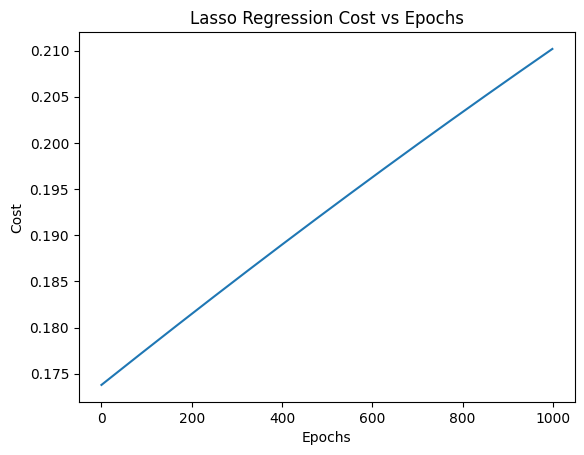

In [ ]:
plt.plot(lasso_cost) # plot for lasso cost function
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Lasso Regression Cost vs Epochs")
plt.show()

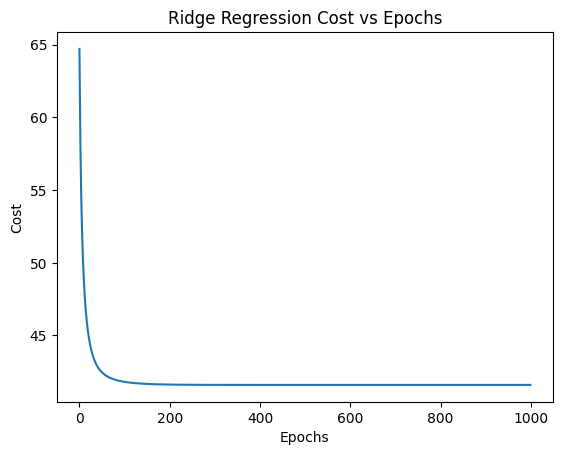

In [ ]:
plt.plot(ridge_cost) #plot for ridge cost function
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Ridge Regression Cost vs Epochs")
plt.show()

# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**


# Logistic Regression

Logistic Regression is a versatile and widely used statistical model for binary and multi-class classification tasks. It's particularly valuable in situations where we want to predict the probability of an event occurring based on input features.

## Explanation

- **Objective**: The primary objective of Logistic Regression is to model the probability of a binary outcome (commonly denoted as 0 or 1) or multiple discrete classes (multi-class) based on input features.

- **Sigmoid Function**: Logistic Regression utilizes the sigmoid function to map the linear combination of input features and model parameters to a probability value within the range of [0, 1]. The sigmoid function is defined as:

  ```
  P(Y=1|X) = 1 / (1 + e^(-z))
  ```

  Where `P(Y=1|X)` represents the probability of the target variable (Y) being 1 given the input features (X), and `z` is the linear combination of input features and their associated coefficients.

- **Model Parameters**: The model learns a set of coefficients (`bi`) and an intercept term (`b0`) during the training process. These parameters are adjusted to fit the data optimally.

- **Training**: Logistic Regression is trained using optimization techniques like Batch Gradient Descent or Newton's method to maximize the likelihood of the observed outcomes. The goal is to find the parameter values that make the model's predictions as close as possible to the actual outcomes.

- **Classification**: To make predictions, Logistic Regression applies a threshold (typically 0.5) to the estimated probabilities. If `P(Y=1|X) >= 0.5`, the model predicts class 1; otherwise, it predicts class 0 (in binary classification). For multi-class problems, it assigns the class with the highest predicted probability.

- **Evaluation**: Model performance is assessed using various metrics, including accuracy, precision, recall, F1-score, and ROC-AUC, depending on the specific problem and requirements.

- **Advantages**: Logistic Regression is interpretable, easy to implement, and provides insights into the influence of input features on the outcome. It can handle both linear and non-linear relationships.

- **Applications**: It finds applications in fields like healthcare (disease diagnosis), marketing (customer churn prediction), finance (credit scoring), and natural language processing (text classification).



In [ ]:
def logistic(x,w):#defining the sigmoid function
    z=1/(1+(math.exp(-1*np.dot(x,w))))
    return z

In [ ]:
def logistic_cost(X,y,w):#defining the  cost
    m,n=X.shape
    cost=0
    for i in range(m):
      cost+=y[i]*math.log(logistic(X[i],w))+(1-y[i])*math.log(1-logistic(X[i],w))
    cost=0-cost
    return cost/m

In [ ]:
def logistic_gradient(X,y,w):#definig the gradient
    m,n=X.shape
    dj_dw=np.zeros((n,1))
    for i in range (m):
        temp=logistic(X[i],w)-y[i]
        for j in range(n):
          dj_dw[j]+=temp*X[i,j]
    return dj_dw/m

In [ ]:
def logistic_gradient_descent(X,Y,w,a,iterations):#defining the gradient descent
    m,n=X.shape
    for i in range (iterations):
        dj_dw=logistic_gradient(X,Y,w)
        for j in range(n):
            w[j]-=a*dj_dw[j]#updating the weights
        logistic_cost_arr.append(logistic_cost(X,Y,w))
    return w


In [ ]:
w=np.zeros((9,1))
a=0.01
iterations=1100
global logistic_cost_arr
logistic_cost_arr=[]
print(logistic_gradient_descent(X_train,Y_train,w,a,iterations))

[[-0.65245467]
 [ 0.24411328]
 [ 0.74538059]
 [-0.13605052]
 [ 0.13366273]
 [-0.01191683]
 [ 0.36896193]
 [ 0.07479064]
 [ 0.04844996]]


In [ ]:
correct=0;
m,n=X_test.shape
zeroes_num=0
for i in range (m):
    temp=np.dot(X_test[i],w)
    if temp<0.8:
        temp=0
    else:
        temp=1
    if temp==Y_test[i]:
        correct+=1
    if Y_test[i]==0:
        zeroes_num+=1
print("Accuracy: ", (correct/m)*100, "%")

Accuracy:  78.0 %


## **_Least Squares Classification_**

In [ ]:
# creating one hot encoding for the outcome column to create binary classes

one_hot_encoded_data = pd.get_dummies(data, columns = ['Outcome'])

In [ ]:
#creating the target matrix and splitting into training and test set

T_complete = one_hot_encoded_data[['Outcome_0', 'Outcome_1']].values
m = 400
T_train = T_complete[:m, :]
m = 100
T_test = T_complete[-m:, :]
T_train.shape

(400, 2)

In [ ]:
#finding Weights vector for discriminant function

beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ T_train)
X_test.shape

(100, 9)

In [ ]:
#assigning to class that yields highest value for each x

Y_pred = []
for x in X_test:
  y = beta.T @ x.T
  maxpos = np.argmax(y)
  Y_pred.append(maxpos)
len(Y_pred)

100

In [ ]:
# Evaluate the model's performance

equal = 0
for i in range(100) :
  if Y_pred[i]==Y_test[i]:
    equal+=1

print("Accuracy:", equal, "%")

Accuracy: 74 %


## **_Insights drawn_**

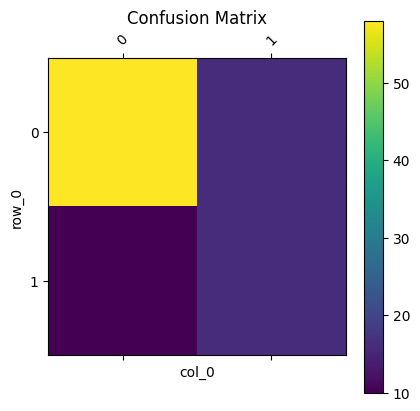

In [ ]:
y_actu = Y_test
y_pred = Y_pred

def plot_confusion_matrix(df_confusion, title='Confusion matrix'):
    plt.matshow(df_confusion) # imshow
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

df_confusion = pd.crosstab(y_actu, y_pred)
plot_confusion_matrix(df_confusion)

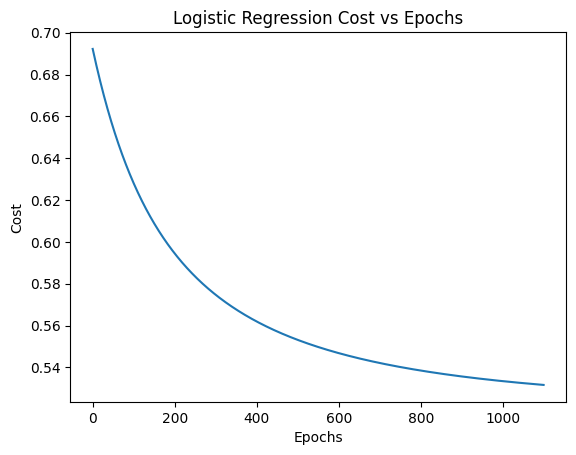

In [ ]:
plt.plot(logistic_cost_arr) #plot for logistic cost function
plt.ylabel("Cost")
plt.xlabel("Epochs")
plt.title("Logistic Regression Cost vs Epochs")
plt.show()

# **_5. References_**

1.   https://developers.google.com/machine-learning/data-prep/transform/normalization
2.  https://towardsdatascience.com/outlier-detection-methods-in-machine-learning-1c8b7cca6cb8
3. https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31
4. https://matplotlib.org/stable/index.html
5. https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
6. https://cs229.stanford.edu/main_notes.pdf
